In [173]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [174]:
data = pd.read_csv("high_diamond_ranked_10min.csv")
# show first 5 entries of dataset
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [176]:
# most of these columns are direct opposites or can be worked out using an already existing columns.
drop_cols= ['gameId', 'blueTotalMinionsKilled', 'redTotalMinionsKilled', 'blueDeaths', 'redDeaths', 'redFirstBlood'
            , 
            'blueGoldDiff', 'redGoldDiff', 'redEliteMonsters', 'blueEliteMonsters',  'blueExperienceDiff', 'redExperienceDiff'
           , 'blueGoldPerMin', 'redGoldPerMin', 'redCSPerMin', 'blueCSPerMin']
clean_data = data.drop(drop_cols, axis = 1)

# number of rows and columns
rows, columns = data.shape
print(rows, columns)

9879 40


C:\Users\Jenai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    4949
1    4930
Name: blueWins, dtype: int64

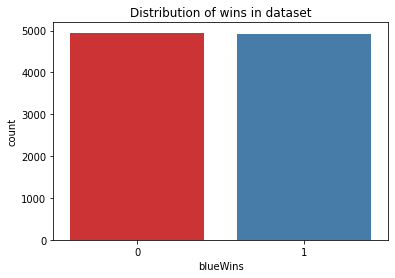

In [177]:
# bar chart to check for bias in the distribution of wins.
plt.title("Distribution of wins in dataset")
sb.countplot(data['blueWins'], palette="Set1")
clean_data['blueWins'].value_counts()

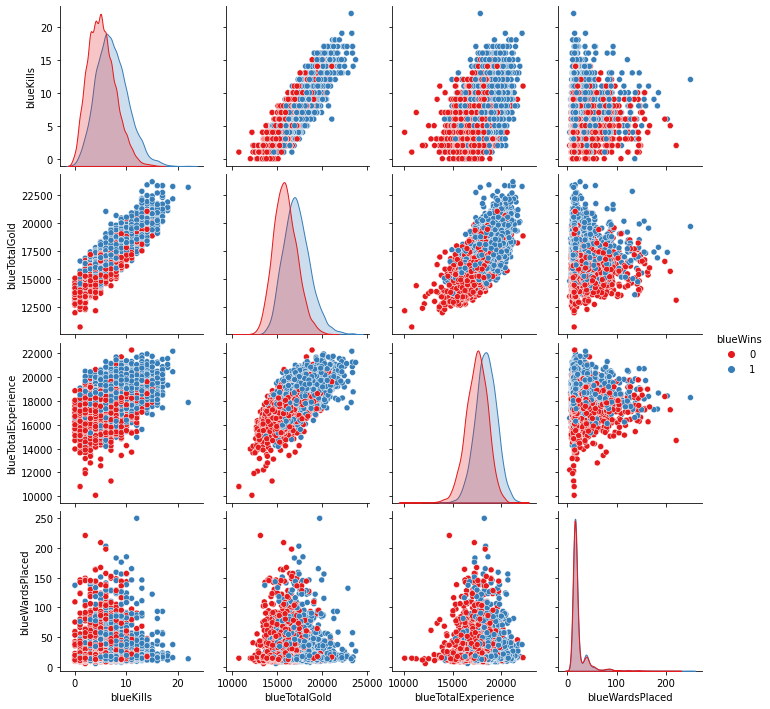

In [178]:
# pairplot to show how blue team stats affect their chances of winning
sb.pairplot(clean_data, hue='blueWins', vars=['blueKills', 'blueTotalGold', 'blueTotalExperience', 'blueWardsPlaced'], palette='Set1')

<AxesSubplot:>

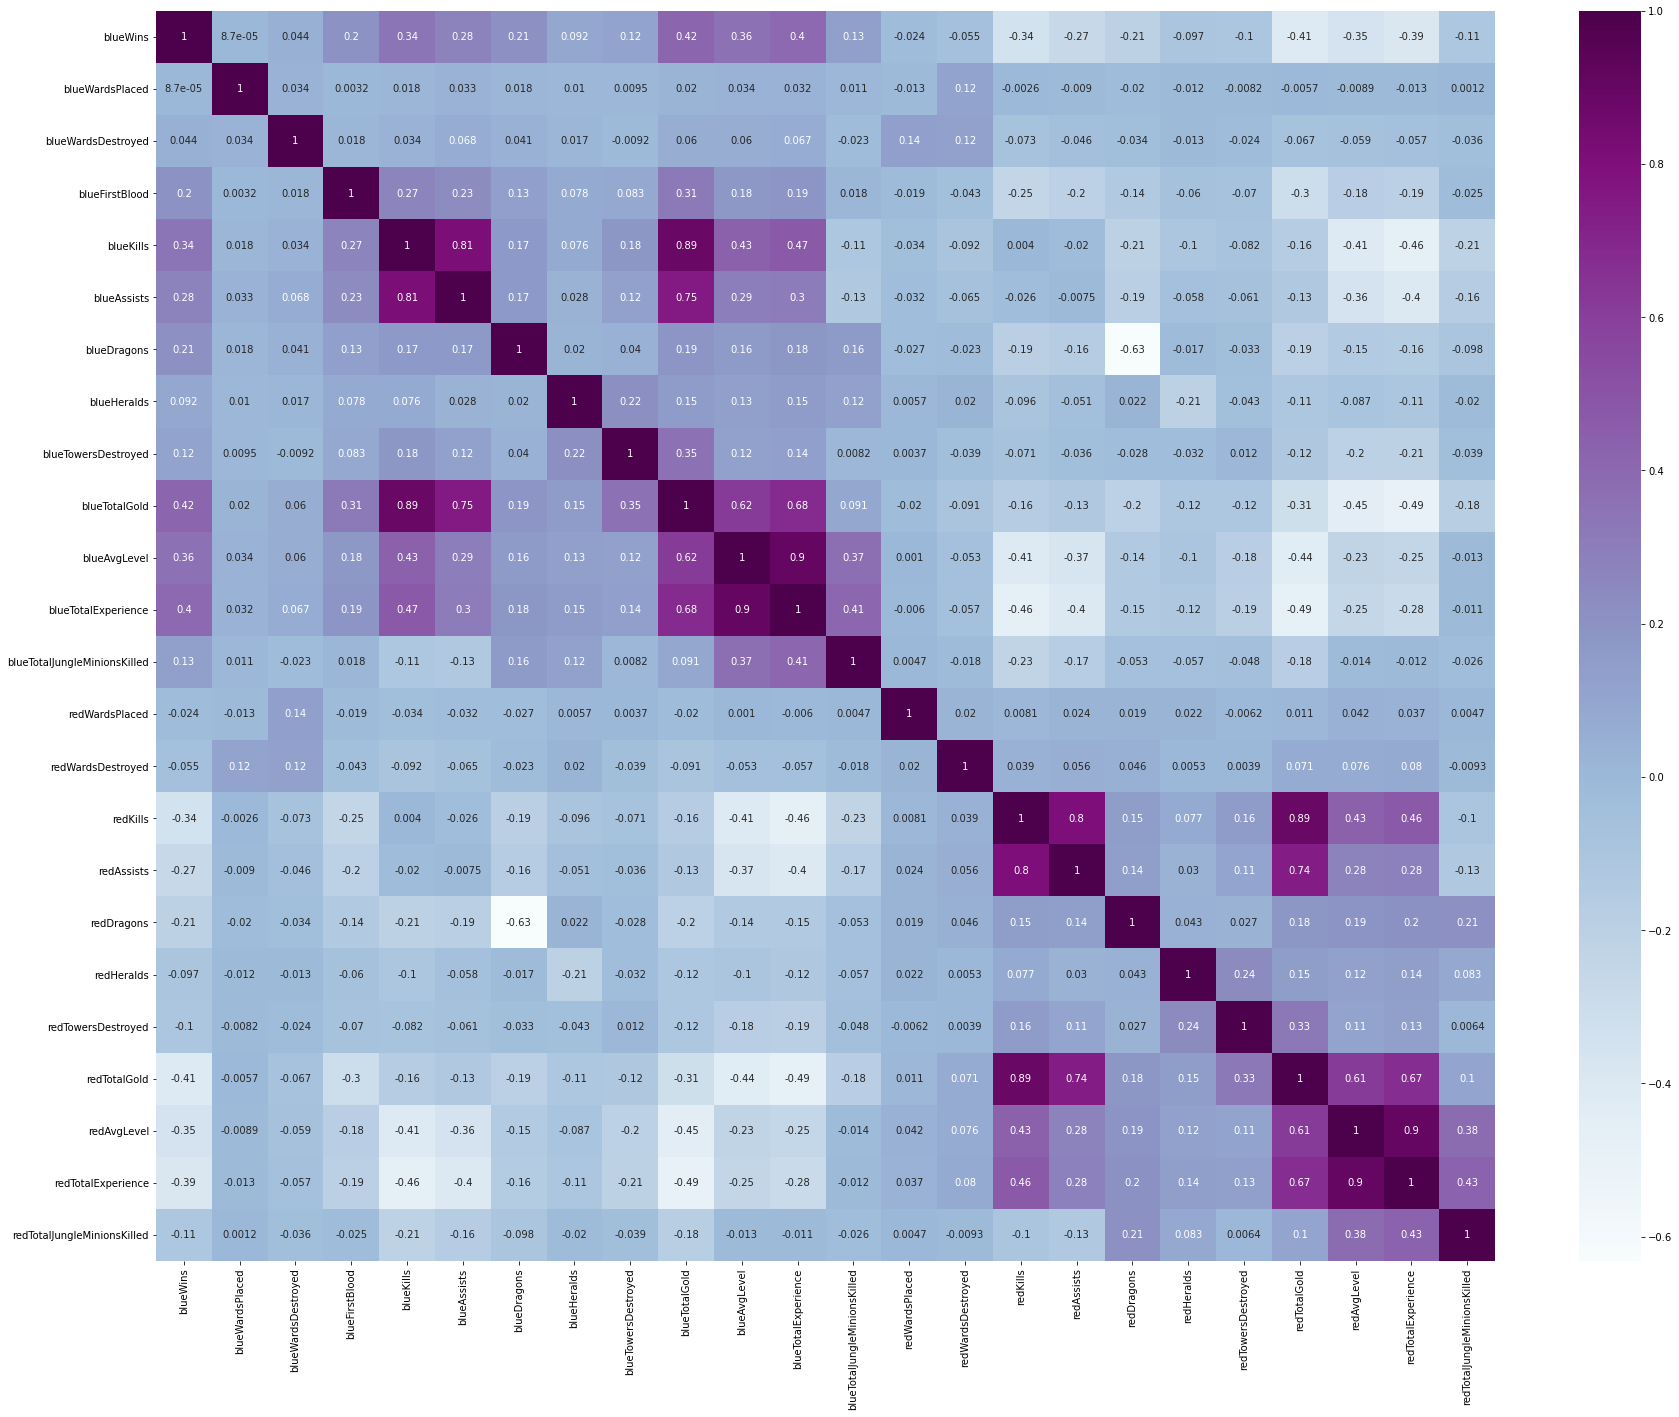

In [179]:
plt.figure(figsize=(30, 23))
sb.heatmap(clean_data.corr(), annot=True, cmap="BuPu")

In [180]:
# dropping variables that have less than 0.2 correlation with blueWins
drop_corr = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalJungleMinionsKilled'
            , 'redHeralds', 'redTowersDestroyed', 'redTotalJungleMinionsKilled', 'blueWardsPlaced', 'redWardsPlaced', 'blueWardsDestroyed'
            , 'redWardsDestroyed']
clean_data = clean_data.drop(drop_corr, axis=1)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   blueWins             9879 non-null   int64  
 1   blueFirstBlood       9879 non-null   int64  
 2   blueKills            9879 non-null   int64  
 3   blueAssists          9879 non-null   int64  
 4   blueDragons          9879 non-null   int64  
 5   blueTotalGold        9879 non-null   int64  
 6   blueAvgLevel         9879 non-null   float64
 7   blueTotalExperience  9879 non-null   int64  
 8   redKills             9879 non-null   int64  
 9   redAssists           9879 non-null   int64  
 10  redDragons           9879 non-null   int64  
 11  redTotalGold         9879 non-null   int64  
 12  redAvgLevel          9879 non-null   float64
 13  redTotalExperience   9879 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB
